Final PdS

ROJAS ORTIZ FASSOLA LAUTARO NICOLAS

42729986

In [70]:
import numpy as np 
import math as mp
from scipy.io.wavfile import read  #para leer archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal
import pywt#libreria para trabajar con onditas
from scipy.signal import qmf, daub
import scipy.linalg


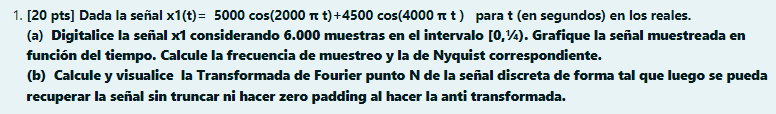

La señal será muestreada a  24000.0 muestras por segundo y su frecuencia de Nyquist será  8000 



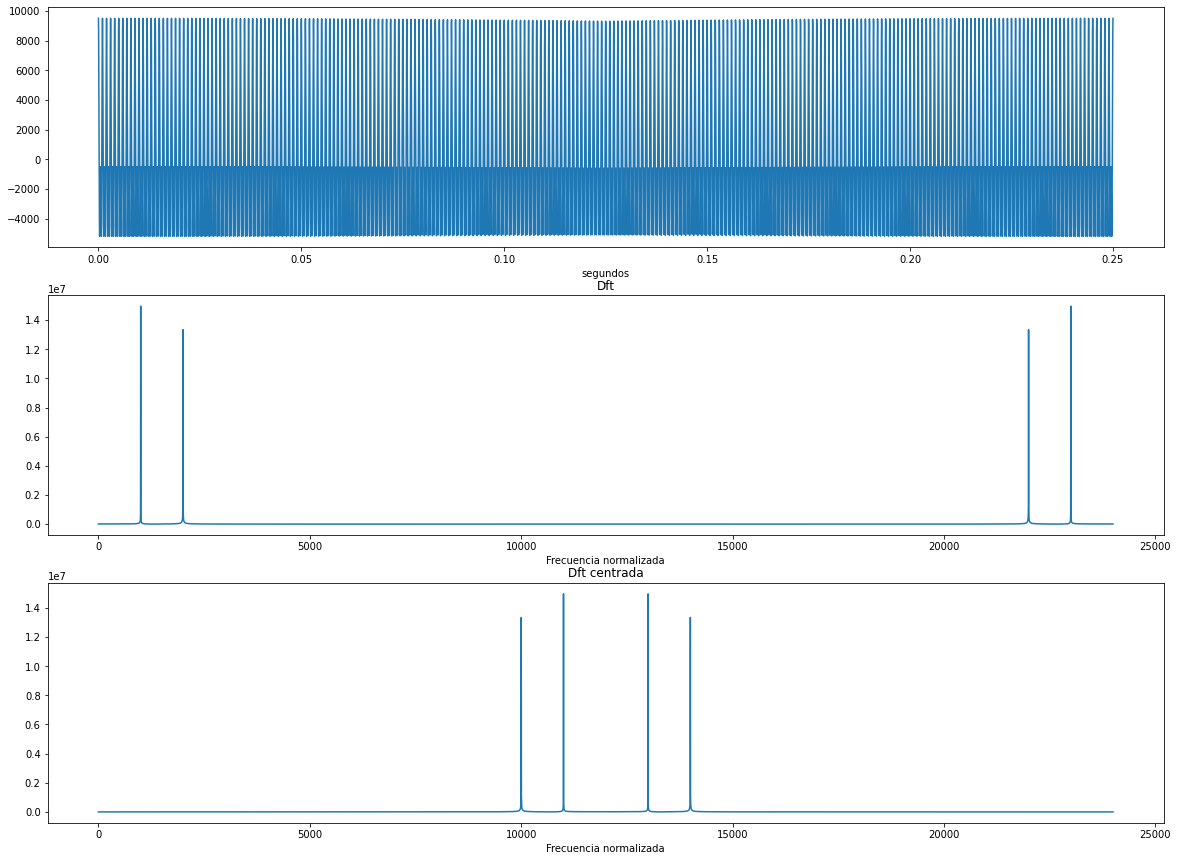

In [31]:
A=5000
B=4500
C=2000
D=4000
M=6000

pi=np.pi

tn= np.linspace(0,(0.25),M)

x1=(A*np.cos(C*pi*tn))+(B*np.cos(D*pi*tn))

fm=M/(1/4) #muestras/segundo
fn=D*2 #la frecuencia de nyquist debe ser al menos el doble de la frecuencia de mayor variación de la señal

print('La señal será muestreada a ',fm,
      'muestras por segundo y su frecuencia de Nyquist será ',fn,'\n')



#DFT.N
#para calcular la dft.n y poder recuperar la señal debo asegurar por lo menos que la tf tenga la misma longitud que la señal discretizada, en este caso, con tener más de 6000 muestras puedo asegurar recuperar la señal sin truncamiento ni zero padding

v=np.arange(M)
dft=fft(x1,M)

Frec_en_Hertzs=np.arange(M)/M*fm


plt.figure(figsize=(20,15))
plt.subplot(311),plt.plot(tn,x1)
plt.xlabel('segundos')

plt.subplot(312)
plt.plot(Frec_en_Hertzs,abs(dft))
plt.title('Dft')
plt.xlabel('Frecuencia normalizada')

plt.subplot(313), plt.plot(Frec_en_Hertzs,abs(fftshift(dft)))
plt.title('Dft centrada')
plt.xlabel('Frecuencia normalizada')

plt.show()


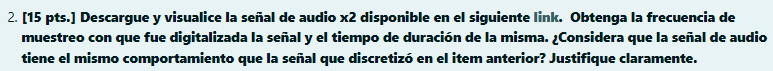

La longitud del vector es:  12000 
 
la frecuencia de muestreo es  24000 Hertz, es decir 24000 muestras por segundo
 
y el audio está guardado en el vector "señal": 
 
 [9500 8726 6580 ... 3535 6580 8726] 

El audio tiene una duración de 0.5 segundos 
 
El audio tiene 24000 muestras 



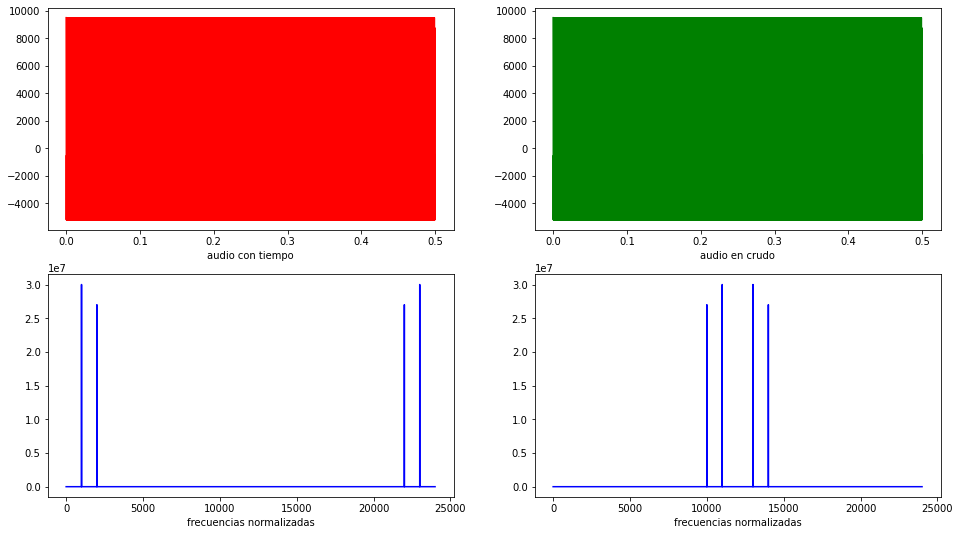

In [54]:
#leo y guardo el audio

audio=read('x2.wav')
fma=audio[0] #frecuencia de muestreo

señal=audio[1][:,0] #audio en variable
duracion=len(señal)/fma

L=len(señal)
t=np.arange(L)/fma #vector de tiempos discretizados 
print('La longitud del vector es: ',len(señal),
      '\n \nla frecuencia de muestreo es ',fma,'Hertz, es decir',fma,'muestras por segundo'
      '\n \ny el audio está guardado en el vector "señal": \n \n',señal,'\n\nEl audio tiene una duración de',duracion,'segundos \n',
      '\nEl audio tiene',fma,'muestras \n')

Frecs=np.arange(L)/L*fma
dfta=fft(señal,L)

plt.figure(figsize=(16,9))
plt.subplot(221)
plt.plot(t, señal ,color='r', label='Audio con tiempo',)
plt.xlabel('audio con tiempo')

plt.subplot(222)
plt.plot(t,señal,color='g', label='Audio en crudo',)
plt.xlabel('audio en crudo')

plt.subplot(223)
plt.plot(Frecs,abs(dfta),color='b',label='Dft señal')
plt.xlabel('frecuencias normalizadas')

plt.subplot(224)
plt.plot(Frecs,abs(fftshift(dfta)),color='b',label='dft centrada')
plt.xlabel('frecuencias normalizadas')
plt.show()

#al ser una señal que varía mucho en el tiempo al visualizarlo, no puedo definir si su comportamiento es similar o no al audio de la sección anterior
#si no puedo verlo en el tiempo, analizo a la señal en frecuencia para conocer sus componentes.
#al analizar las señales en frecuencia se podría decir que son similares ya que sus componentes principales en frecuencia son similares en amplitud


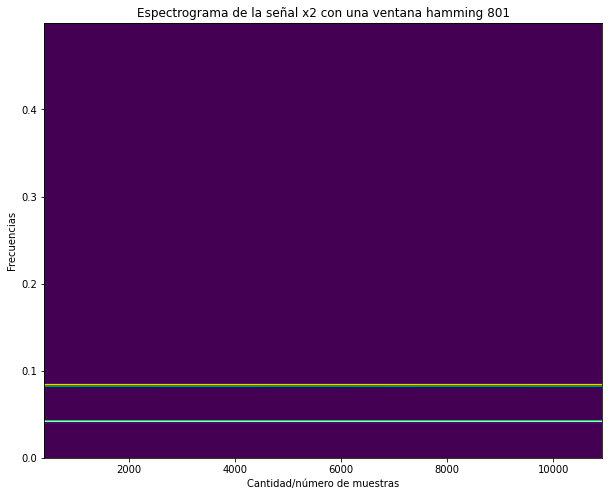

In [62]:
l8=801 #longitud
ham=signal.hamming(l8) #ventana Hammming



f1, t1, Sxx1 = signal.spectrogram(señal,window=ham, noverlap=None)       #espectrograma de la señal con una ventana rectangular 151
fig,axs=plt.subplots(figsize=(10,8))
axs.pcolormesh(t1,f1,Sxx1) 
axs.set_title('Espectrograma de la señal x2 con una ventana hamming 801')
plt.xlabel('Cantidad/número de muestras')
plt.ylabel('Frecuencias')
plt.show()

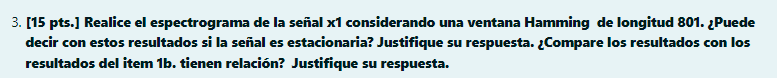

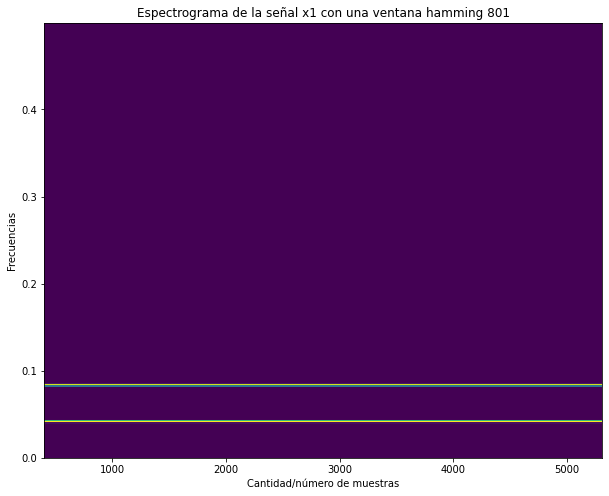

In [64]:
l8=801 #longitud
ham=signal.hamming(l8) #ventana Hammming



f1, t1, Sxx1 = signal.spectrogram(x1,window=ham, noverlap=None)       #espectrograma de la señal con una ventana rectangular 151
fig,axs=plt.subplots(figsize=(10,8))
axs.pcolormesh(t1,f1,Sxx1) 
axs.set_title('Espectrograma de la señal x1 con una ventana hamming 801')
plt.xlabel('Cantidad/número de muestras')
plt.ylabel('Frecuencias')
plt.show()



#si con el espectrograma se observa claramente que la señal es estacionaria y que además tienen el mismo comportamiento en el plano tiempo y frecuencia ya que tienen las mismas componentes frecuenciales.


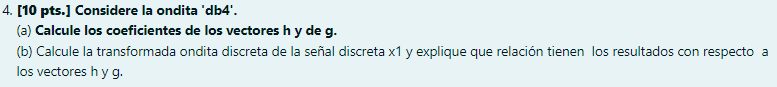


 Escala:

 [ 0.00000000e+00  1.06147874e-01  3.29369580e-01  6.20051443e-01
  1.00911756e+00  1.10647043e+00  8.76168044e-01  5.30876053e-01
 -3.61061475e-02 -3.10466901e-01 -2.42072768e-01 -1.69824594e-01
  3.94640800e-02  1.22189162e-01  3.43427864e-02  1.27703469e-02
 -1.11248661e-02 -2.36436147e-02  1.96774850e-03  6.12675101e-03
 -1.35062600e-03 -6.96948973e-04  2.24609849e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]

 Ondita madre:

 [ 0.         -0.00488281 -0.01515103 -0.02852243 -0.04641951 -0.02331601
  0.04528042  0.1366954   0.26387257  0.20940024 -0.04787675 -0.39392643
 -0.88951658 -0.44388309  1.0516298   1.02997098 -0.40769914 -0.59957477
  0.07035879  0.13318996 -0.02936137 -0.01515103  0.00488281  0.
  0.          0.          0.          0.          0.        ]

Asociado a filtros pasa bajo y la escala:

 [[ 0.00000000e+00  7.50578813e-02  2.32899463e-01  4.38442580e-01
   7.13553869e-01  7.82392743e-01  6.195

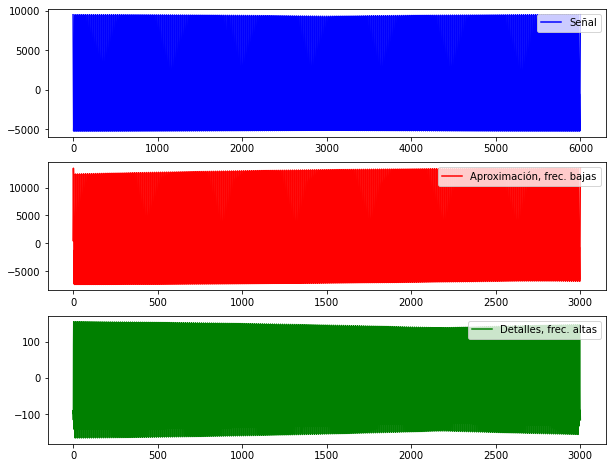

In [80]:
pywt.wavelist(kind='all')

#a) Dar el vector de coeficientes de la función escala y de la función ondita 'db4'

wavelet = pywt.Wavelet('db4')               #ondita db4     
phi, psi, x = wavelet.wavefun(level=2)      #extraigo los coeficientes

print('\n Escala:\n\n',phi)                 #los coeficientes de la funcion escala
print('\n Ondita madre:\n\n',psi)          #los coeficientes de la función ondita

h=np.array([phi])/ mp.sqrt(2)   #coeficientes de la ecuación de dilatación  
g=np.array([psi])/ mp.sqrt(2)  #coeficientes de la ecuación ondita          
print( '\nAsociado a filtros pasa bajo y la escala:\n\n',h)    #asociado a filtros pasa bajo
print('\nAsociado a filtros pasa alto y la ondita:\n\n',g)    #asociado a filtros pasa bajo


cA_h, cD_h = pywt.dwt(x1, 'db4')

fig, axs = plt.subplots(3,1,figsize=(10,8))
axs[0].plot(x1, color='blue', label='Señal')
axs[0].legend(loc='upper right')
axs[1].plot(cA_h, color='red', label='Aproximación, frec. bajas')
axs[1].legend(loc='upper right')
axs[2].plot(cD_h, color='green', label='Detalles, frec. altas') 
axs[2].legend(loc='upper right')
plt.show()